<h4>Importation des bibliothèques</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h4>Lecture des données en mémoires</h4>

In [2]:
data = pd.read_csv("../AAPL/Data/train.csv")
#data = data[data["Date"]> "2000-12-31"]

In [4]:
min(data.Date)

'1981-01-02'

<h4>Création des nouvelles variables</h4>

In [3]:
def features(d, i):
    df = d.copy()
    df["Close_"] = df["Close"].shift(-1)
    df["Open_"] = df["Open"].shift(-1)
    df["High_"] = df["High"].shift(-1)
    df["Low_"] = df["Low"].shift(-1)
    df["Close__"] = df["Close"].shift(1)
    df["Open__"] = df["Open"].shift(1)
    df["High__"] = df["High"].shift(1)
    df["Low__"] = df["Low"].shift(1)
    df["Gain"] = np.where(df["Close"] > df["Close_"], 1, -1)
    df["CBody"] = (df["High"]- df["Low"]).shift(-1)
    df["Trend"] = np.where(df["Close"]>df["Open"], 1, -1)
    df["Body"] = np.abs(df["Open"]-df["Close"])
    df["StdV"] = df["Volume"].rolling(i).std()/df["Body"]
    df["Variation"] = df["High"] - df["Low"]
    df["M"] = df["Variation"] - df["Body"]
    
    df["Msup"] = np.where(df["Open"]>df["Close"], (df["High"] - df["Open"])/df["Body"], (df["High"] - df["Close"])/df["Body"])
    df["Minf"] = np.where(df["Open"]>df["Close"],(df["Close"] -  df["Low"])/df["Body"] , (df["Open"] - df["Low"])/df["Body"])
    df["H"] = df["High"].rolling(i).std()/df["Body"]
    df["O"] = df["Open"].rolling(i).std()/df["Body"]
    df["C"] = df["Close"].rolling(i).std()/df["Body"]
    df["L"] = df["Low"].rolling(i).std()/df["Body"]
    df["L1"] = (df["Low"] - df["Low__"]).abs()/df["Body"]
    df["O1"] = (df["Open"] - df["Open__"]).abs()/df["Body"]
    df["C1"] = (df["Close"] - df["Close__"]).abs()/df["Body"]
    df["H1"] = (df["High"] - df["High__"]).abs()/df["Body"]
    df["alpha"] = (df["Msup"] + df["Minf"])/df["Body"]
    df["sl"] = np.where(df["Trend"]==1, df["High_"] - df["Open_"], df["Open_"] - df["Low_"])
    df["tp"] = np.where(df["Trend"]==1, df["Open_"] - df["Low_"], df["High_"] - df["Open_"])
    df = df.dropna()
    return df

<h4>Analyse de la Stratégie</h4>

In [5]:
X = features(data, 28)
X = X[X["Trend"]==1]
x = "H1"
y = "O1"
z1 = "tp"
z2 = "sl"

Text(0.5, 0, 'sl')

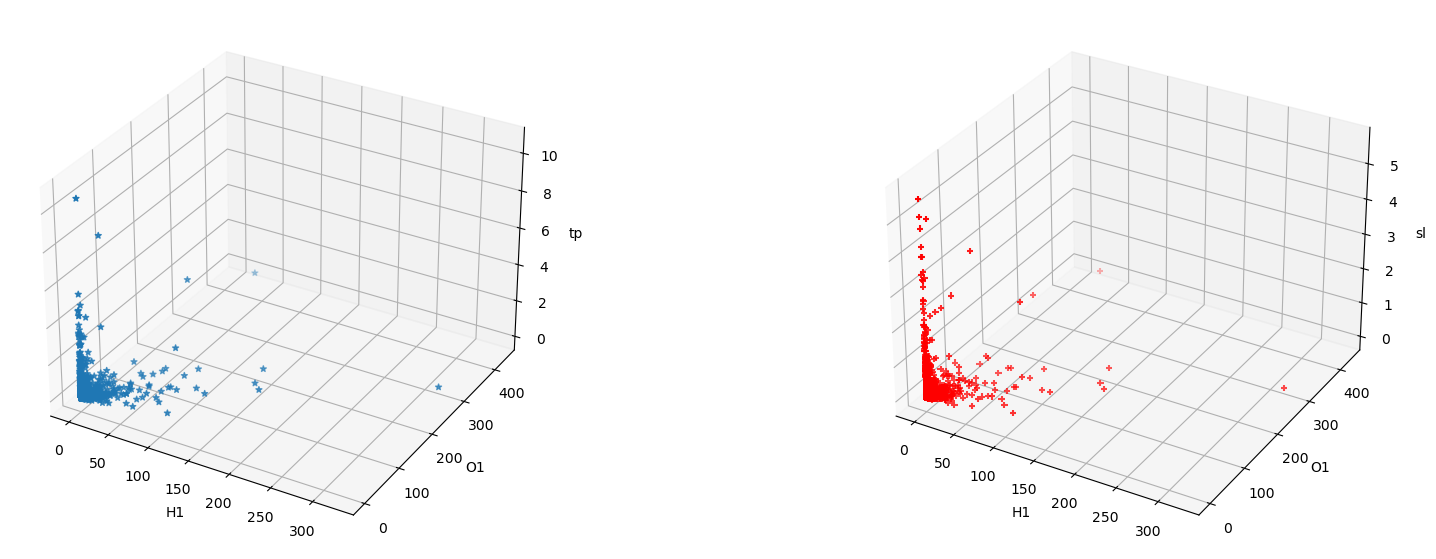

In [6]:
fig,axes = plt.subplots(figsize=(20, 7), ncols=2, nrows=1, subplot_kw={'projection': '3d'})
axes[0].scatter(X[x],X[y],X[z1], marker = "*")
axes[0].set_xlabel(x)
axes[0].set_ylabel(y)
axes[0].set_zlabel(z1)

axes[1].scatter(X[x],X[y],X[z2], marker = "+", color = "r")
axes[1].set_xlabel(x)
axes[1].set_ylabel(y)
axes[1].set_zlabel(z2)

In [224]:
X_ = X[X["M"]>=2]

Text(0.5, 0, 'sl')

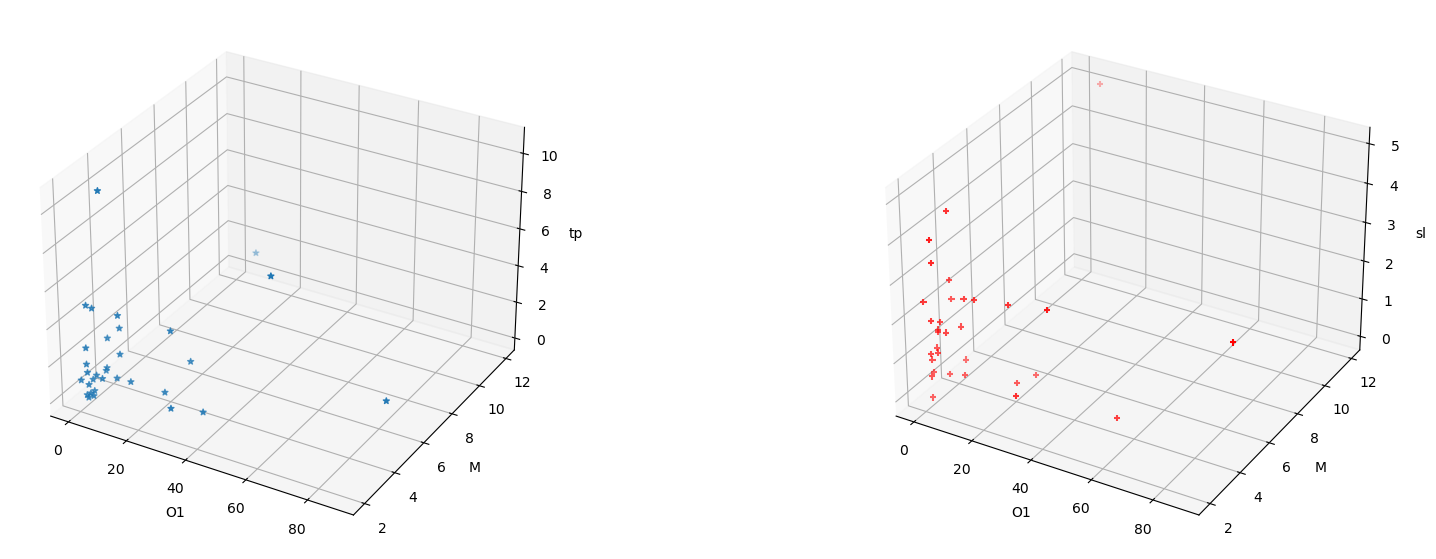

In [225]:
fig,axes = plt.subplots(figsize=(20, 7), ncols=2, nrows=1, subplot_kw={'projection': '3d'})
axes[0].scatter(X_[x],X_[y],X_[z1], marker = "*")
axes[0].set_xlabel(x)
axes[0].set_ylabel(y)
axes[0].set_zlabel(z1)

axes[1].scatter(X_[x],X_[y],X_[z2], marker = "+", color = "r")
axes[1].set_xlabel(x)
axes[1].set_ylabel(y)
axes[1].set_zlabel(z2)

### Stratégie HL : Si le Msup<5 body>4
#### tp = 2 sl = 1

In [235]:
X = features(data, 5)
X = X[X["Trend"]==-1]
x = "C1"
y = "M"
z1 = "tp"
z2 = "sl"

Text(0.5, 0, 'sl')

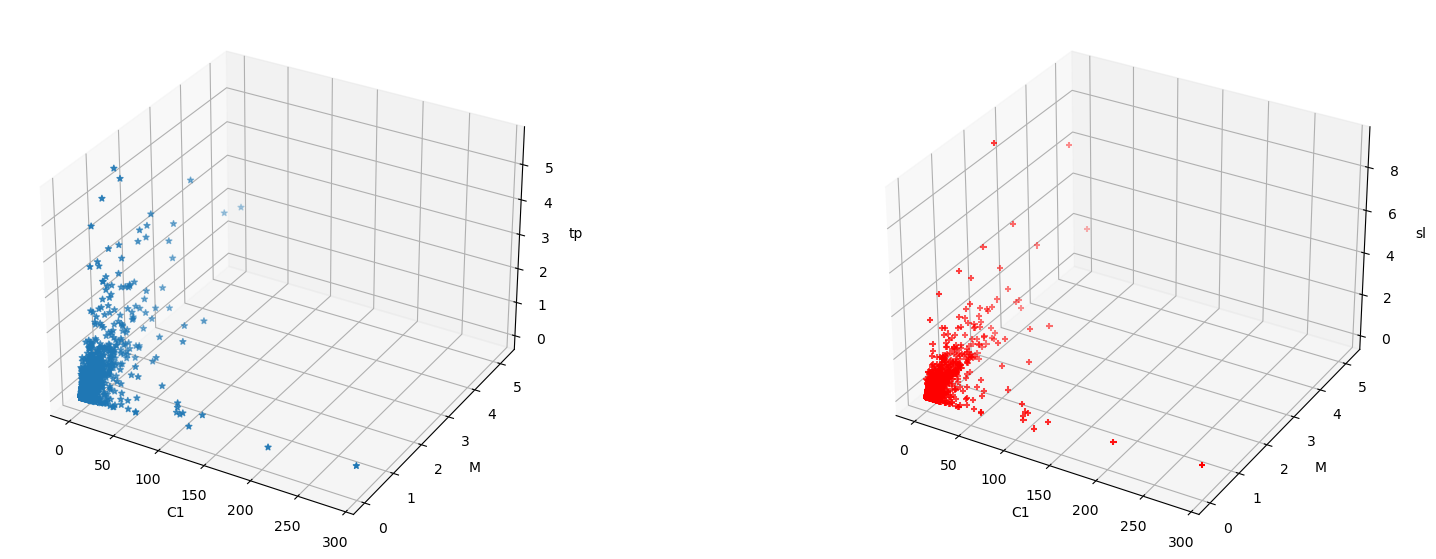

In [236]:
fig,axes = plt.subplots(figsize=(20, 7), ncols=2, nrows=1, subplot_kw={'projection': '3d'})
axes[0].scatter(X[x],X[y],X[z1], marker = "*")
axes[0].set_xlabel(x)
axes[0].set_ylabel(y)
axes[0].set_zlabel(z1)

axes[1].scatter(X[x],X[y],X[z2], marker = "+", color = "r")
axes[1].set_xlabel(x)
axes[1].set_ylabel(y)
axes[1].set_zlabel(z2)

In [239]:
X_ = X[X["M"]>=2]

Text(0.5, 0, 'sl')

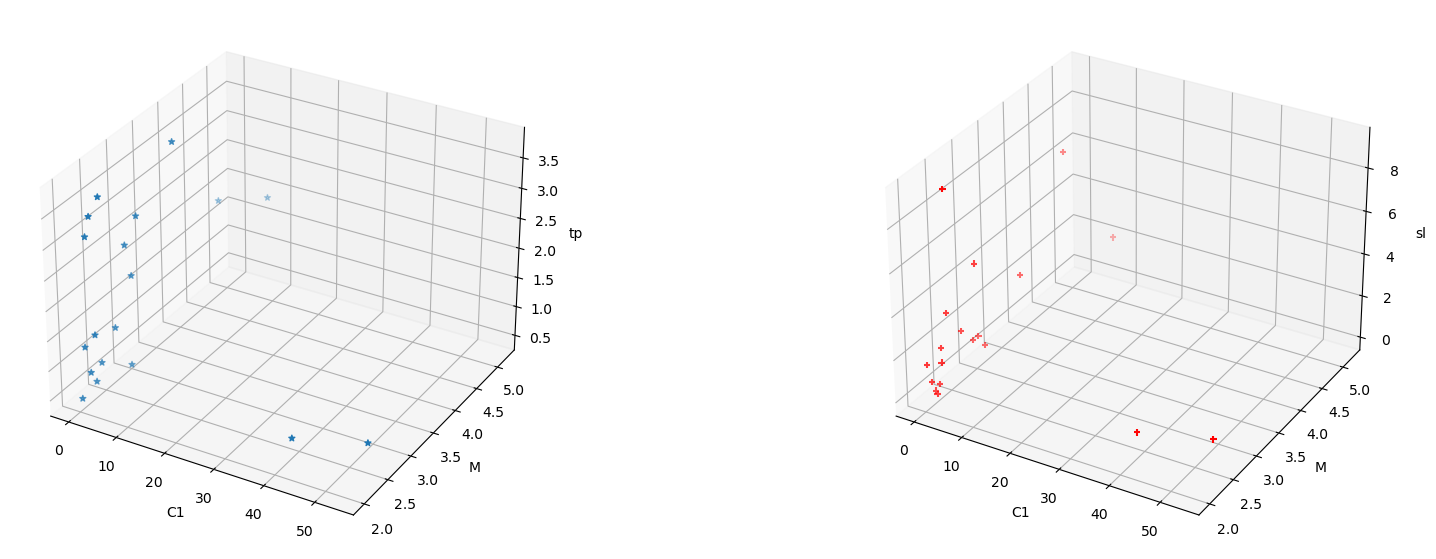

In [240]:
fig,axes = plt.subplots(figsize=(20, 7), ncols=2, nrows=1, subplot_kw={'projection': '3d'})
axes[0].scatter(X_[x],X_[y],X_[z1], marker = "*")
axes[0].set_xlabel(x)
axes[0].set_ylabel(y)
axes[0].set_zlabel(z1)

axes[1].scatter(X_[x],X_[y],X_[z2], marker = "+", color = "r")
axes[1].set_xlabel(x)
axes[1].set_ylabel(y)
axes[1].set_zlabel(z2)

## Stratégie

In [36]:
X_ = X[X["C"]>100]

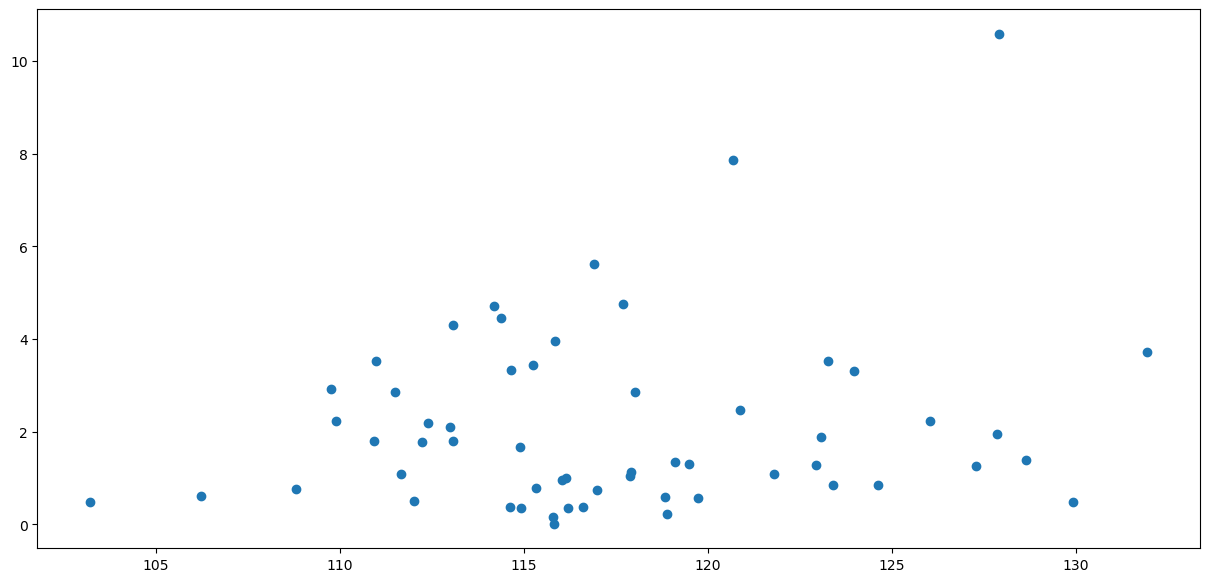

In [37]:
plt.figure(figsize=(15, 7))
plt.scatter(X_["C"], X_["tp"])

## Ceux qui produisent du gain

In [139]:
cible = X[(X["Gain"]==1)]
problem = X[(X["Trend"] == 1) & (X["Gain"] == -1)]

In [114]:
print(cible.shape)
print(problem.shape) # il y a plus de up down que up up: on peux définir une strategy sur ca

(2375, 18)
(1336, 18)


### Voir les gain expecté

<AxesSubplot:xlabel='Variation', ylabel='Count'>

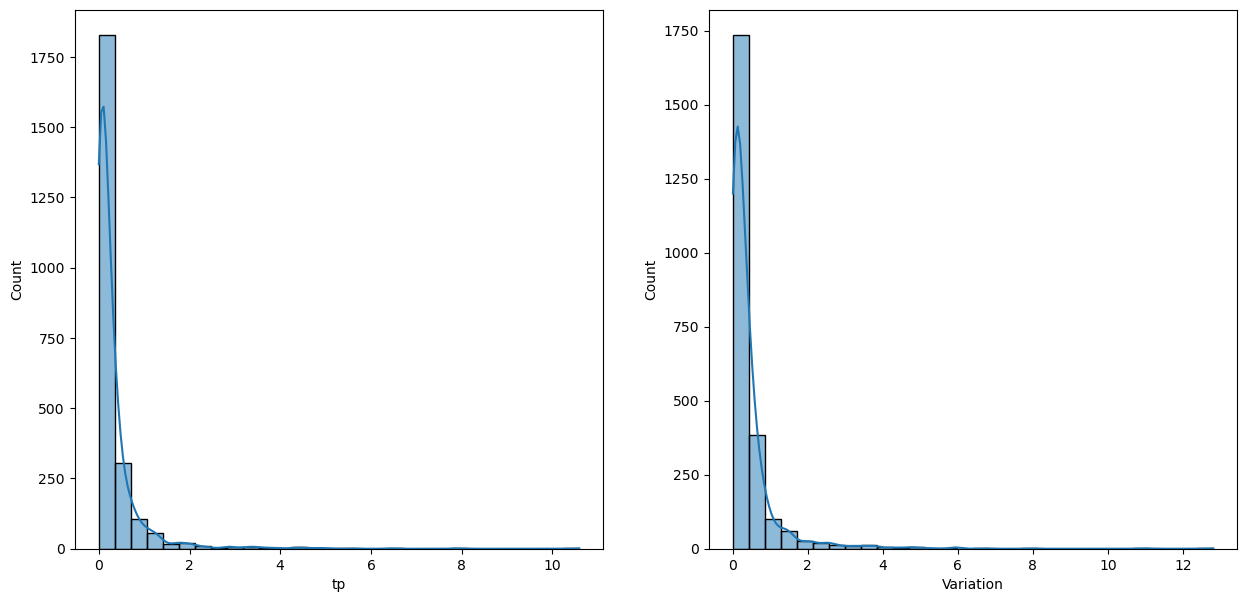

In [154]:
fig, axis = plt.subplots(figsize = (15, 7), nrows=1, ncols=2)
sns.histplot(cible["tp"], kde=True, bins=30, ax=axis[0])
sns.histplot(cible["Variation"], kde=True, bins=30, ax=axis[1])

In [155]:
cible_voulue = cible[cible["tp"]>3]

<AxesSubplot:xlabel='Variation', ylabel='Count'>

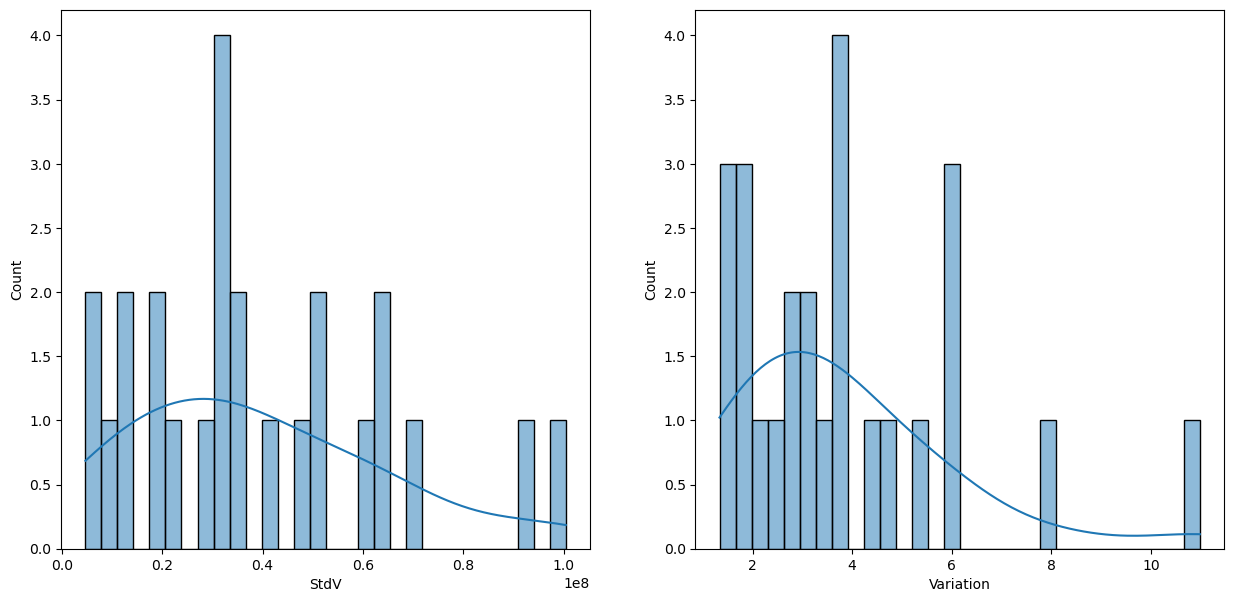

In [156]:
fig,axis = plt.subplots(figsize = (15, 7), ncols=2, nrows=1)
sns.histplot(cible_voulue["StdV"], kde=True, bins=30, ax=axis[0])
sns.histplot(cible_voulue["Variation"], kde=True, bins=30, ax=axis[1])

## Problem analysis

(-0.35056270000000034, 7.444316700000008)

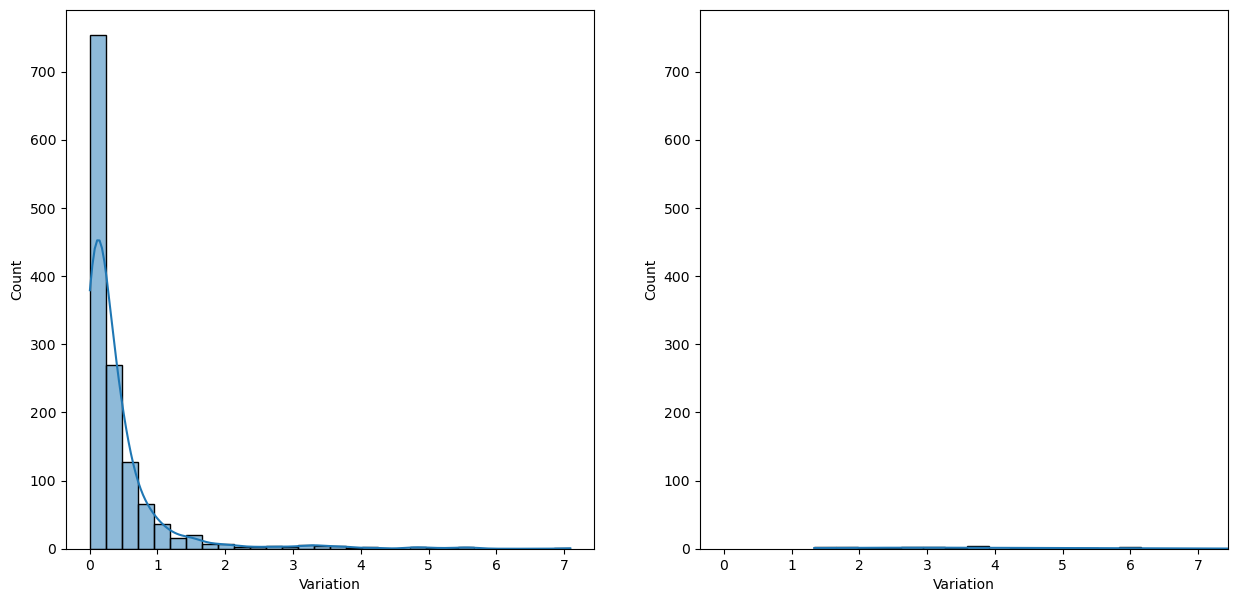

In [157]:

plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(problem["Variation"], kde=True, bins=30)
plt.subplot(1,2,2)
sns.histplot(cible_voulue["Variation"], kde=True, bins=30)
plt.subplot(1, 2, 1)
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
plt.subplot(1, 2, 2)
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)

(1.7533737500000026, 7.344129250000008)

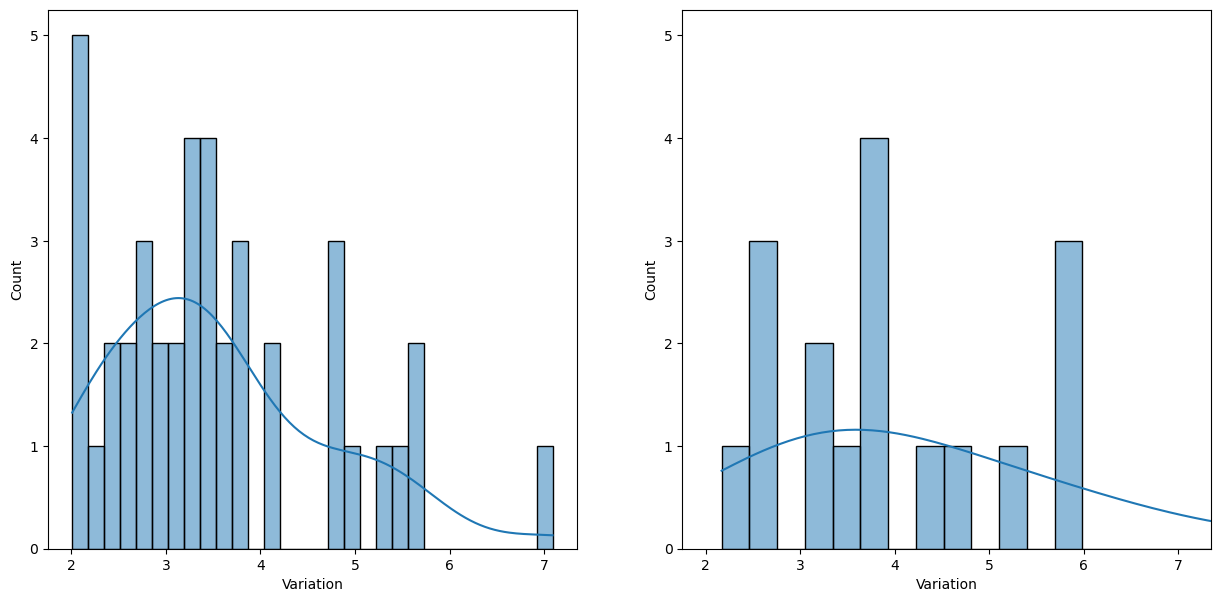

In [161]:
c = cible_voulue[cible_voulue["Variation"]>2]
p = problem[problem["Variation"]>2]
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(p["Variation"], kde=True, bins=30)
plt.subplot(1,2,2)
sns.histplot(c["Variation"], kde=True, bins=30)
plt.subplot(1, 2, 1)
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
plt.subplot(1, 2, 2)
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)

In [162]:
print(c.shape)
print(p.shape)

(19, 18)
(41, 18)


(4772764.387044279, 228730860.47040227)

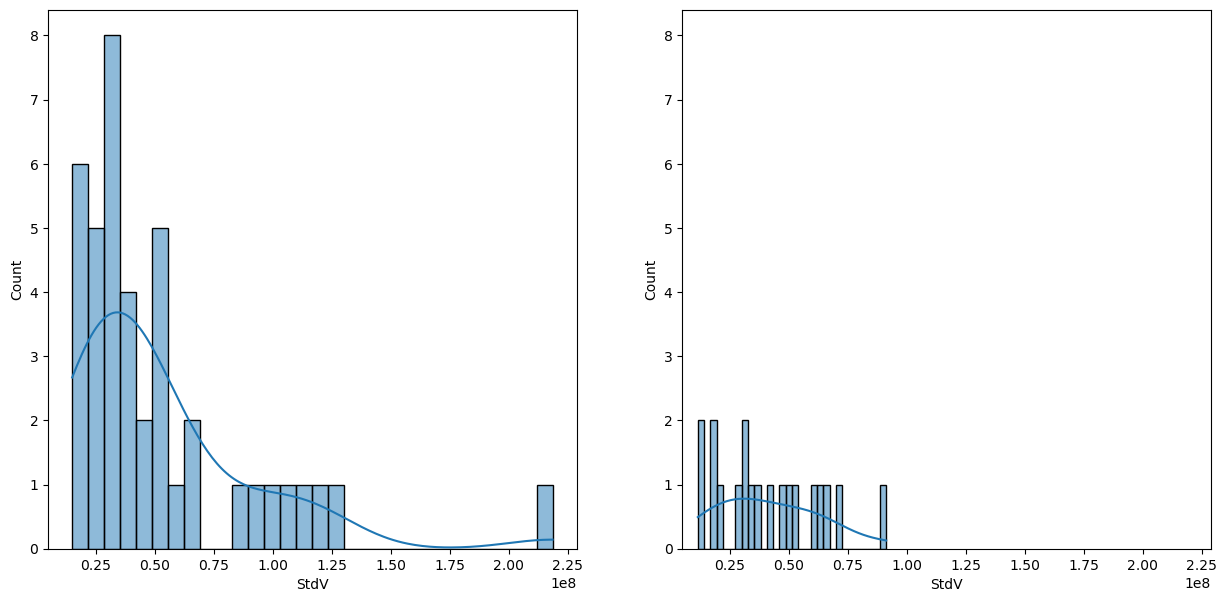

In [163]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(p["StdV"], kde=True, bins=30)
plt.subplot(1,2,2)
sns.histplot(c["StdV"], kde=True, bins=30)
plt.subplot(1, 2, 1)
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
plt.subplot(1, 2, 2)
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)

In [122]:
c[c["StdV"]<10**8]

,Date,Open,High,Low,Close,Adj Close,Volume,Close_,Open_,High_,Low_,Gain,CBody,Trend,StdV,Variation,sl,tp
8722,2015-08-03,30.375000,30.642500,29.379999,29.610001,26.792227,279904000,28.660000,29.355000,29.424999,28.312500,1,1.112499,-1,6.127082e+07,1.262501,0.069999,1.042500
9346,2018-01-24,44.312500,44.325001,43.299999,43.555000,41.296173,204420400,42.777500,43.627499,43.737499,42.632500,1,1.104999,-1,3.731290e+07,1.025002,0.110000,0.994999
9353,2018-02-02,41.500000,41.700001,40.025002,40.125000,38.044064,346375200,39.122501,39.775002,40.970001,39.000000,1,1.970001,-1,8.089577e+07,1.674999,1.194999,0.775002
9355,2018-02-06,38.707500,40.930000,38.500000,40.757500,38.643753,272975200,39.884998,40.772499,40.849998,39.767502,1,1.082496,1,8.596061e+07,2.430000,0.077499,1.004997
9356,2018-02-07,40.772499,40.849998,39.767502,39.884998,37.816505,206434400,38.787498,40.072498,40.250000,38.757500,1,1.492500,-1,6.422997e+07,1.082496,0.177502,1.314998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,2020-12-15,124.339996,127.900002,124.129997,127.879997,125.996178,157243700,127.809998,127.410004,128.369995,126.559998,1,1.809997,1,3.308870e+07,3.770005,0.959991,0.850006
10077,2020-12-17,128.899994,129.580002,128.039993,128.699997,126.804077,94359800,126.660004,128.960007,129.100006,126.120003,1,2.980003,-1,3.108425e+07,1.540009,0.139999,2.840004
10080,2020-12-22,131.610001,134.410004,129.649994,131.880005,129.937256,168904800,130.960007,132.160004,132.429993,130.779999,1,1.649994,1,4.374585e+07,4.760010,0.269989,1.380005
10083,2020-12-28,133.990005,137.339996,133.509995,136.690002,134.676407,124486200,134.869995,138.050003,138.789993,134.339996,1,4.449997,1,4.272285e+07,3.830001,0.739990,3.710007


(13, 18)
(25, 18)


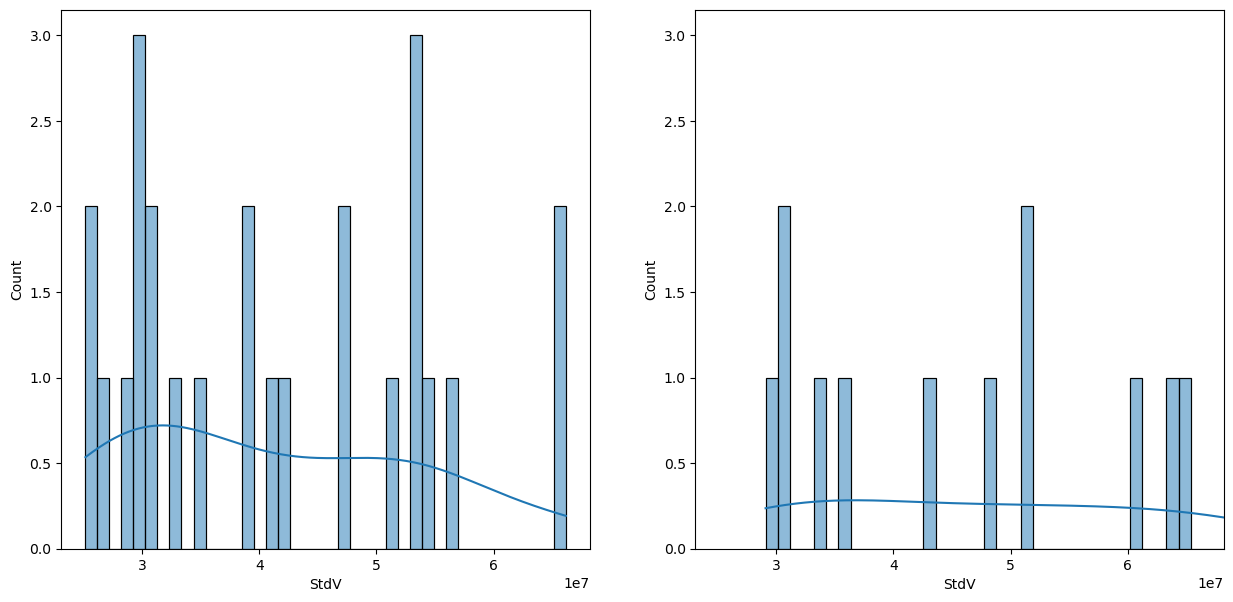

In [164]:
c_ = c[(c["StdV"]>0.25*10**8 )& (c["StdV"]<0.75*10**8)]
p_ = p[(p["StdV"]>0.25*10**8 )& (p["StdV"]<0.75*10**8)]
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(p_["StdV"], kde=True, bins=40)
plt.subplot(1,2,2)
sns.histplot(c_["StdV"], kde=True, bins=40)
plt.subplot(1, 2, 1)
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
plt.subplot(1, 2, 2)
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
print(c_.shape)
print(p_.shape)

In [168]:
gestion_risque = c_

(13, 18)
(25, 18)


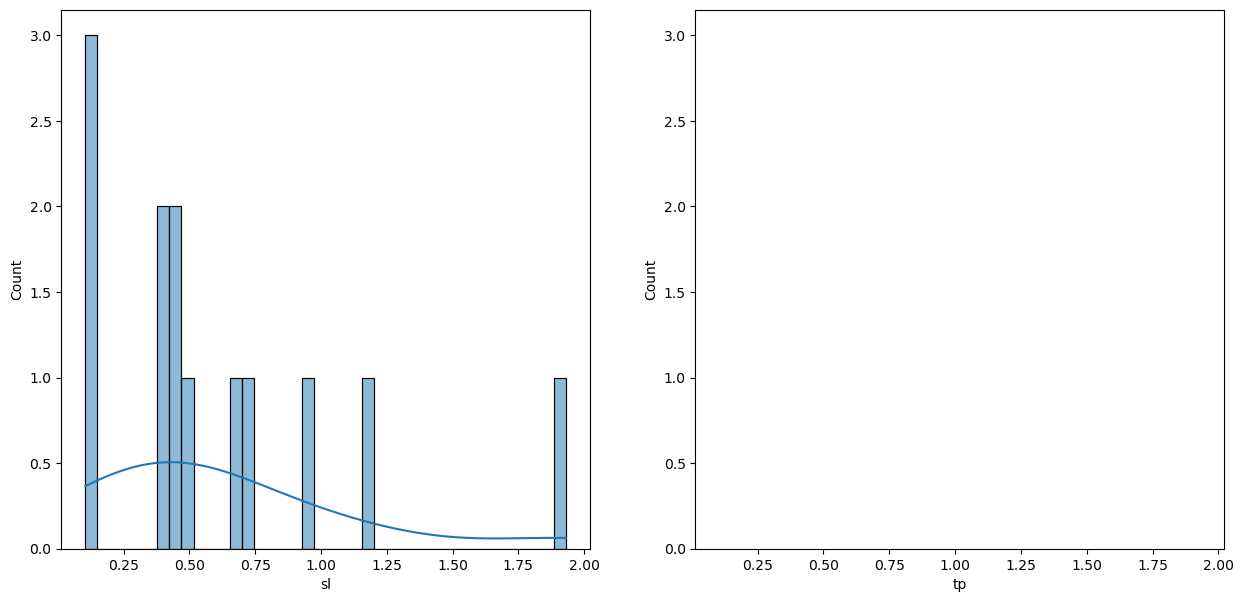

In [166]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(gestion_risque["sl"], kde=True, bins=40)
plt.subplot(1,2,2)
sns.histplot(gestion_risque["tp"], kde=True, bins=40)
plt.subplot(1, 2, 1)
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
plt.subplot(1, 2, 2)
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
print(c_.shape)
print(p_.shape)

(13, 18)
(25, 18)


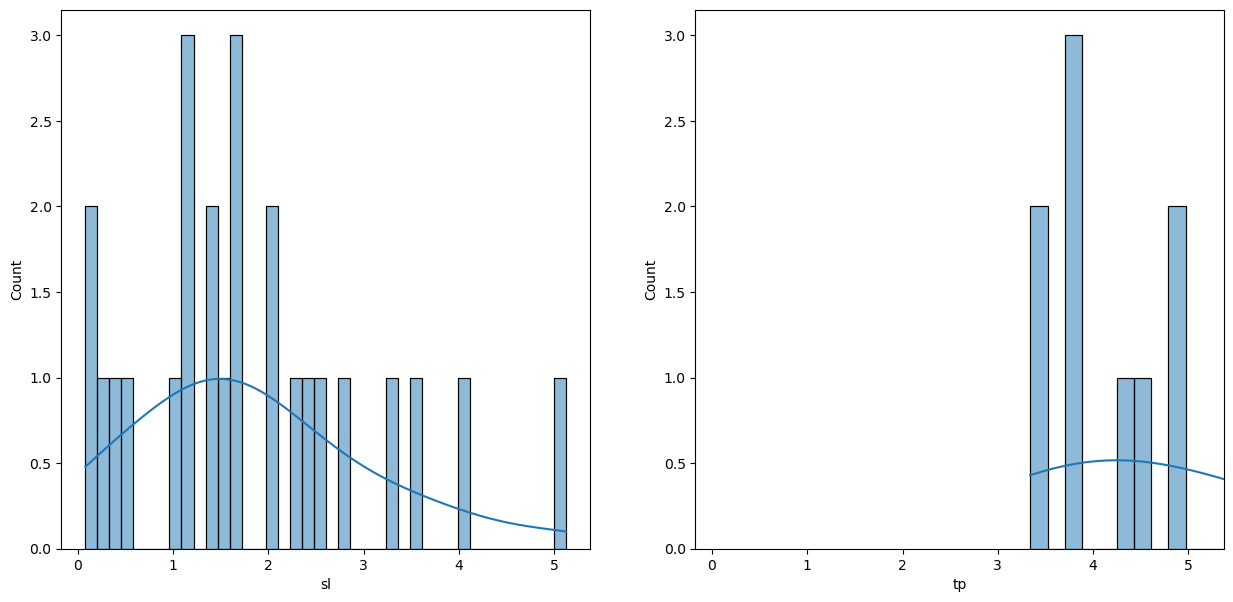

In [169]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(p_["sl"], kde=True, bins=40)
plt.subplot(1,2,2)
sns.histplot(gestion_risque["tp"], kde=True, bins=40)
plt.subplot(1, 2, 1)
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
plt.subplot(1, 2, 2)
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
print(gestion_risque.shape)
print(p_.shape)

### stratégie: variation > 2, stdV5 compris entre 0.25* 10 **8 et 0.751*0 **8

In [191]:
eval = pd.read_csv("../AAPL/Data/train.csv")

In [190]:
print(min(eval["Date"]))
print(max(evaluation["Date"]))

2021-01-04
2023-05-26


In [192]:
evaluation = features(eval, 5)

In [193]:
evaluation["Profit"] = np.where((evaluation["Trend"]==1)&(evaluation["Variation"]>=2)& ((evaluation["StdV"]>0.25*10**8)& (evaluation["StdV"]<0.75*10**8)),1, 0 )

In [194]:
profit = evaluation[evaluation["Profit"] == 1]
profit["GP"] = np.where((profit["tp"]>=3) & (profit["sl"]<=2), 1, -1)

/var/folders/dz/rlqdtnhj7qd3wqf1j2ynkg_m0000gn/T/ipykernel_3267/3416764981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit["GP"] = np.where((profit["tp"]>=3) & (profit["sl"]<=2), 1, -1)


In [195]:
profit.groupby("GP").size()

GP
-1    46
 1     9
dtype: int64